In [7]:
#Import Linear Algebra
using LinearAlgebra, Distributions

# Import PyPlot for visualizations and diagnostics.
using PyPlot

# Set a seed for reproducibility.
using Random
Random.seed!(12);

using MAT, Images

In [8]:
mat = matread("mnist_small.mat")
X = mat["X"]
N, D = size(X)[1], size(X)[2]

(10000, 784)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


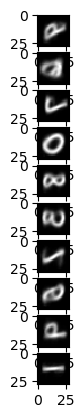

200


In [12]:
K = 10
if(K >= N)
    print("Too many clusters")
end
numIter = 200;  # maximum number of iterations to run
batch_size = 100 #batch size for online EM

#  initialize si2 
si2 = 1;

#initialize pk uniformly
pk = ones((K, 1)) / K;

# We initialize the means totally randomly
mu = rand(Float64, (K, D))
new_mu = rand(Float64, (K, D))
z = zeros((batch_size, K))
N_k = zeros((K, 1))

for iter = 1:numIter
    lr = (2 + iter)^(-0.55)
    X_b = X[sample(1:N, batch_size, replace = false), :]
    print(iter, '\n')
    for n = 1:batch_size
        for k = 1:K
            z[n,k] = log(pk[k, 1]) - (0.5/si2)*(norm(X_b[n, :] - mu[k, :]))^2  
        end
        maxz   = max(z[n])
        sum1=0
        for k = 1:K
            sum1=sum1+exp(z[n, k]-maxz)
        end
        for k = 1:K
            z[n, k]=exp(z[n, k]-maxz-log(sum1))
        end
#         z[n, k]= exp(z[n, k] - maxZ - log(sum(np.exp(z[n] - maxZ))))
    end
    
    for k = 1:K
        N_k[k, 1] = 0
        for n = 1:batch_size
            N_k[k, 1] = N_k[k, 1] + z[n, k]
        end
        # TBD: re-estimate pk
        pk[k, 1] = (1 - lr)*pk[k, 1] + lr*N_k[k, 1]/batch_size
    
    
        #  TBD: re-estimate the means
        new_mu[k, :] = zeros((1, D))
        for n = 1:batch_size
            new_mu[k, :] = new_mu[k, :] + z[n, k]*X_b[n, :]
        end
        if(N_k[k] != 0)
            mu[k, :] = (1 - lr)*mu[k, :] + lr*new_mu[k, :]/N_k[k, 1]
        end
    end
    
    new_si2 = 0
    for n = 1:batch_size
        for k = 1:K
            new_si2 = new_si2 + z[n, k]*(norm(X_b[n, :] - mu[k, :]) )^2
        end
    end
    si2 = (1 - lr)*si2 + lr*new_si2/(batch_size*D)
end
    
for k = 1:K
    mu2 = reshape(mu[k, :], (28, 28))
#     mu2 = circshift(mu2, (1, 1))
    subplot(K,1,k)
    imshow(mu2, cmap = "gray")
#     PyPlot.savefig("Online_EM_K=$(K)_mu$(k)")
end

In [70]:
# using 
# mu2 = reshape(mu[1, :], (28, 28))
# imshow(mu2, cmap = "gray")
# mu[1, :]
# X_b = X[sample(1:N, batch_size, replace = false), :]
# X_b[2, :] - mu[2, :]
# maxZ   = max(z[2])
# exp(z[2, :])
# n
# new_mu[2, :] = zeros((1, D))
X_b

100×784 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.